# Predicting Movie Rental Durations

This project uses regression models to predict the number of days a customer rents DVDs for.
As with most data science projects, the data is read in from a csv file called rental_info.csv.

## Project Instruction

A DVD rental company needs your help! They want to figure out how many days a customer will rent a DVD for based on some features and has approached you for help. They want you to try out some regression models which will help predict the number of days a customer will rent a DVD for. ***The company wants a model which yeilds a MSE of 3 or less on a test set.*** The model you make will help the company become more efficient inventory planning.

**Task:**

* Use regression models to predict the number of days a customer rents DVDs.

**Data Preprocessing:**

***Read the data:***
   Read the CSV file `rental_info.csv` using pandas.

**Data Preprocessing:**

* **Create a new feature:**
   Create a new column named `rental_length_days` by calculating the difference between `return_date` and `rental_date`.
* **Feature Engineering:**
   Create dummy variables for the `special_features` column:
     * `deleted_scenes`
     * `behind_the_scenes`
* **Prepare Data for Modeling:**
   Select relevant features for the model, avoiding leakage.
   Create a pandas DataFrame `X` containing the features.
   Set the target variable `y` as `rental_length_days`.

**Model Training and Evaluation:**

* **Split the data:**
   Split the data into training and testing sets with a 20/80 ratio.
* **Model Selection:**
   Consider the following regression models:
     * Linear Regression
     * Random Forest
     * Gradient Boosting
     * XGBoost
* **Model Training:**
   Train each model on the training data.
* **Model Evaluation:**
   Evaluate the models using the following metrics:
     * Mean Squared Error (MSE)
     * Other relevant metrics
* **Best Model Selection:**
   Select the model with the lowest MSE as the best model.

**Output:**

* **Best Model:** Save the best model as `best_model`.
* **Best MSE:** Save the best model's MSE on the test set as `best_mse`.

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

In [83]:
# Load the dataset
df_rental = pd.read_csv("rental_info.csv")

# 1. Data Exploration

## Visualizations:
* Distribution of the target variable (`rental_length_days`).
* Correlation heatmap of numerical features.
* Boxplot for features like `rental_rate` and `replacement_cost` against `rental_length_days`.

In [84]:
df_rental

,rental_date,return_date,amount,release_year,rental_rate,length,replacement_cost,special_features,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2
0,2005-05-25 02:54:33+00:00,2005-05-28 23:40:33+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
1,2005-06-15 23:19:16+00:00,2005-06-18 19:24:16+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
2,2005-07-10 04:27:45+00:00,2005-07-17 10:11:45+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
3,2005-07-31 12:06:41+00:00,2005-08-02 14:30:41+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
4,2005-08-19 12:30:04+00:00,2005-08-23 13:35:04+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15856,2005-08-22 10:49:15+00:00,2005-08-29 09:52:15+00:00,6.99,2009.0,4.99,88.0,11.99,"{Trailers,""Deleted Scenes"",""Behind the Scenes""}",0,0,0,1,48.8601,7744.0,24.9001
15857,2005-07-31 09:48:49+00:00,2005-08-04 10:53:49+00:00,4.99,2009.0,4.99,88.0,11.99,"{Trailers,""Deleted Scenes"",""Behind the Scenes""}",0,0,0,1,24.9001,7744.0,24.9001
15858,2005-08-20 10:35:30+00:00,2005-08-29 13:03:30+00:00,8.99,2009.0,4.99,88.0,11.99,"{Trailers,""Deleted Scenes"",""Behind the Scenes""}",0,0,0,1,80.8201,7744.0,24.9001
15859,2005-07-31 13:10:20+00:00,2005-08-08 14:07:20+00:00,7.99,2009.0,4.99,88.0,11.99,"{Trailers,""Deleted Scenes"",""Behind the Scenes""}",0,0,0,1,63.8401,7744.0,24.9001


In [85]:
df_rental.dtypes

rental_date          object
return_date          object
amount              float64
release_year        float64
rental_rate         float64
length              float64
replacement_cost    float64
special_features     object
NC-17                 int64
PG                    int64
PG-13                 int64
R                     int64
amount_2            float64
length_2            float64
rental_rate_2       float64
dtype: object

In [86]:
# verify dataset inconsistencies have been remove
df_rental.head().T

,0,1,2,3,4
rental_date,2005-05-25 02:54:33+00:00,2005-06-15 23:19:16+00:00,2005-07-10 04:27:45+00:00,2005-07-31 12:06:41+00:00,2005-08-19 12:30:04+00:00
return_date,2005-05-28 23:40:33+00:00,2005-06-18 19:24:16+00:00,2005-07-17 10:11:45+00:00,2005-08-02 14:30:41+00:00,2005-08-23 13:35:04+00:00
amount,2.99,2.99,2.99,2.99,2.99
release_year,2005.0,2005.0,2005.0,2005.0,2005.0
rental_rate,2.99,2.99,2.99,2.99,2.99
length,126.0,126.0,126.0,126.0,126.0
replacement_cost,16.99,16.99,16.99,16.99,16.99
special_features,"{Trailers,""Behind the Scenes""}","{Trailers,""Behind the Scenes""}","{Trailers,""Behind the Scenes""}","{Trailers,""Behind the Scenes""}","{Trailers,""Behind the Scenes""}"
NC-17,0,0,0,0,0
PG,0,0,0,0,0


In [87]:
# Convert rental_date and return_date to datetime format

df_rental["rental_date"] = pd.to_datetime(df_rental["rental_date"])
df_rental["return_date"] = pd.to_datetime(df_rental["return_date"])

In [88]:
# check for missing values in rental date and return date

rental_date = df_rental["rental_date"].isnull().sum()
return_date = df_rental["return_date"].isnull().sum()

rental_date, return_date

(np.int64(0), np.int64(0))

In [89]:
# Calculate rental_length_days

df_rental["rental_length"] = df_rental["return_date"] - df_rental["rental_date"]
df_rental["rental_length_days"] = df_rental["rental_length"].dt.days

df_rental["rental_length_days"]

0        3
1        2
2        7
3        2
4        4
        ..
15856    6
15857    4
15858    9
15859    8
15860    6
Name: rental_length_days, Length: 15861, dtype: int64

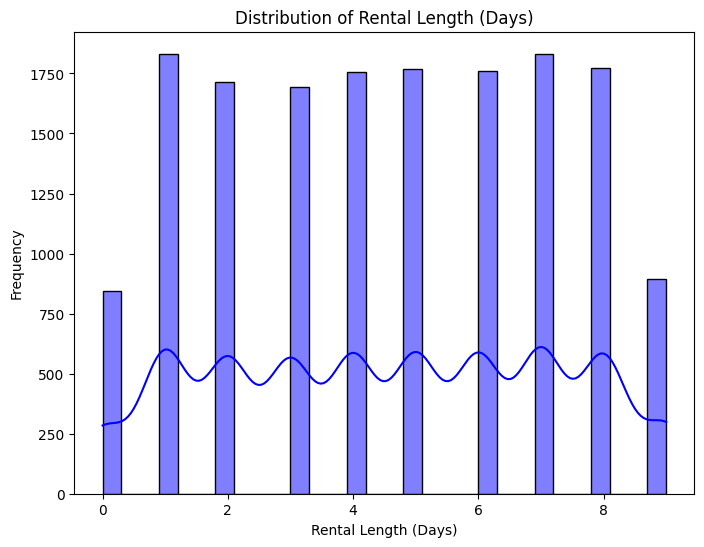

In [90]:
# Plot rental_length_days distribution

plt.figure(figsize=(8, 6))
sns.histplot(df_rental["rental_length_days"], kde=True, bins=30, color="blue")
plt.title("Distribution of Rental Length (Days)")
plt.xlabel("Rental Length (Days)")
plt.ylabel("Frequency")
plt.show()

In [91]:
# filter the numeric columns in the DataFrame before computing the correlation matrix.
numeric_cols = df_rental.select_dtypes(include=['number'])

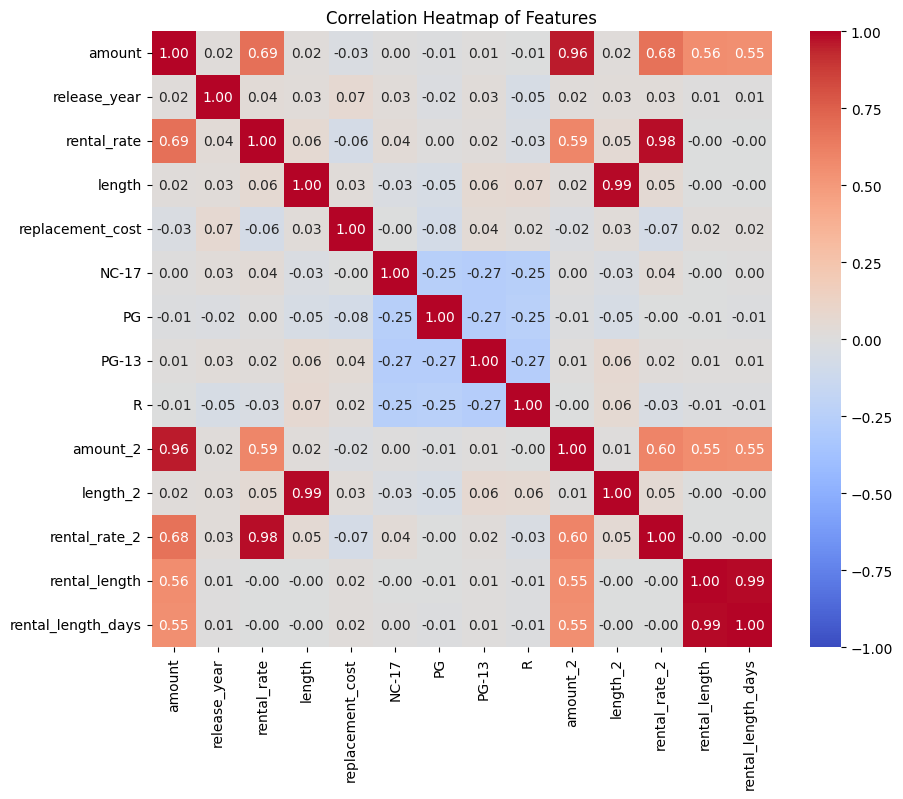

In [92]:
# Plot correlation heatmap

plt.figure(figsize=(10, 8))
corr = numeric_cols.corr()  # Compute correlation only for numeric columns
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Features")
plt.show()

### Correlation Heatmap Analysis

The correlation heatmap provides insights into the relationships between numerical features in the dataset. Key observations include:

1. **Perfect and High Correlations:**
   * `rental_length` and `rental_length_days` show a perfect correlation (1.00), indicating redundancy. Only one should be kept for modeling.
   * Strong positive correlations are seen between variables related to pricing, such as `amount`, `rental_rate`, and `rental_cost_2`.

2. **Weak Negative Correlations:**
   * Movie rating categories like `NC-17`, `PG`, and `R` exhibit weak negative correlations, which is expected due to their mutually exclusive nature.

3. **Data Science Implications:**
   * Redundant variables (e.g., `rental_length` vs. `rental_length_days`) should be considered for removal to avoid multicollinearity.
   * The weak correlations overall suggest that most variables offer unique information, making the dataset suitable for modeling without severe multicollinearity issues.

The heatmap helps identify these relationships and informs feature selection for better predictive model performance.

## 2. Data Preprocessing

**Visualizations:**

* **Count plot of dummy variables** like PG, R, PG-13, and NC-17.
* **Histograms of scaled features** to ensure proper standardization.

In [93]:
# Create dummy variables for special_features

df_rental["deleted_scenes"] = np.where(df_rental["special_features"].str.contains("Deleted Scenes"), 1, 0)
df_rental["behind_the_scenes"] = np.where(df_rental["special_features"].str.contains("Behind the Scenes"), 1, 0)

In [94]:
# Define features (X) and target (y)

X = df_rental.drop(["rental_length_days", "rental_date", "return_date", "special_features", "rental_length"], axis=1)
y = df_rental["rental_length_days"]

In [95]:
X

,amount,release_year,rental_rate,length,replacement_cost,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2,deleted_scenes,behind_the_scenes
0,2.99,2005.0,2.99,126.0,16.99,0,0,0,1,8.9401,15876.0,8.9401,0,1
1,2.99,2005.0,2.99,126.0,16.99,0,0,0,1,8.9401,15876.0,8.9401,0,1
2,2.99,2005.0,2.99,126.0,16.99,0,0,0,1,8.9401,15876.0,8.9401,0,1
3,2.99,2005.0,2.99,126.0,16.99,0,0,0,1,8.9401,15876.0,8.9401,0,1
4,2.99,2005.0,2.99,126.0,16.99,0,0,0,1,8.9401,15876.0,8.9401,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15856,6.99,2009.0,4.99,88.0,11.99,0,0,0,1,48.8601,7744.0,24.9001,1,1
15857,4.99,2009.0,4.99,88.0,11.99,0,0,0,1,24.9001,7744.0,24.9001,1,1
15858,8.99,2009.0,4.99,88.0,11.99,0,0,0,1,80.8201,7744.0,24.9001,1,1
15859,7.99,2009.0,4.99,88.0,11.99,0,0,0,1,63.8401,7744.0,24.9001,1,1


In [96]:
y

0        3
1        2
2        7
3        2
4        4
        ..
15856    6
15857    4
15858    9
15859    8
15860    6
Name: rental_length_days, Length: 15861, dtype: int64

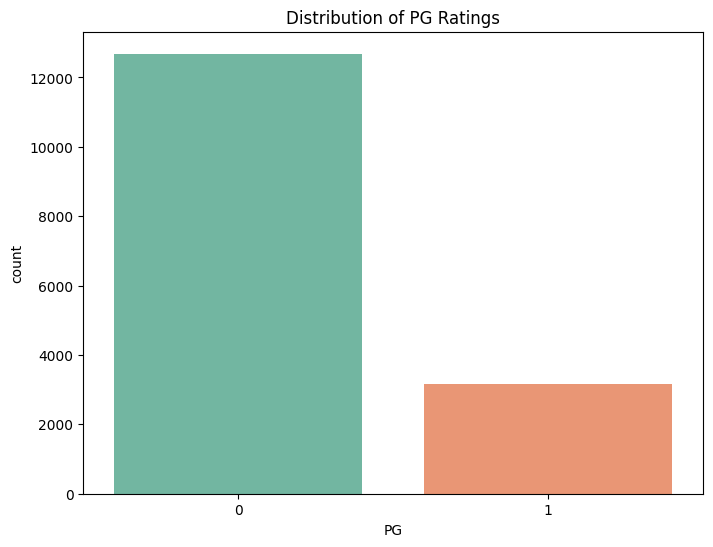

In [97]:
# Plot count of dummy variables (e.g., movie ratings)

plt.figure(figsize=(8, 6))
sns.countplot(x="PG", hue="PG", data=df_rental, palette="Set2", legend=False)
plt.title("Distribution of PG Ratings")
plt.show()

## Analysis of PG Rating Distribution

The count plot of PG ratings shows a binary distribution with "0" for non-PG and "1" for PG-rated movies. A clear ***imbalance*** is evident, with non-PG movies outnumbering PG-rated movies by a ratio of 4:1, meaning PG-rated movies make up about 20% of the dataset.

While this imbalance would typically warrant techniques like ***oversampling, undersampling,*** or ***SMOTE*** in a classification context, it does not affect our ***regression approach***. Our goal is to ***predict the number of rental days, not to classify movies based on ratings. Therefore, the class imbalance observed here has no direct impact on the regression model.***

However, noting this imbalance is important as it demonstrates that, ***had we been performing classification (for example, predicting movie types or preferences), these techniques would have been essential for handling imbalanced classes.*** This analysis reassures us that our regression-based approach for predicting rental days remains unaffected by classification issues, and that the focus on regression was the appropriate choice.

In [98]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [99]:
# peruse count
len(X_train), len(X_test)

(12688, 3173)

In [100]:
# Scale data using StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

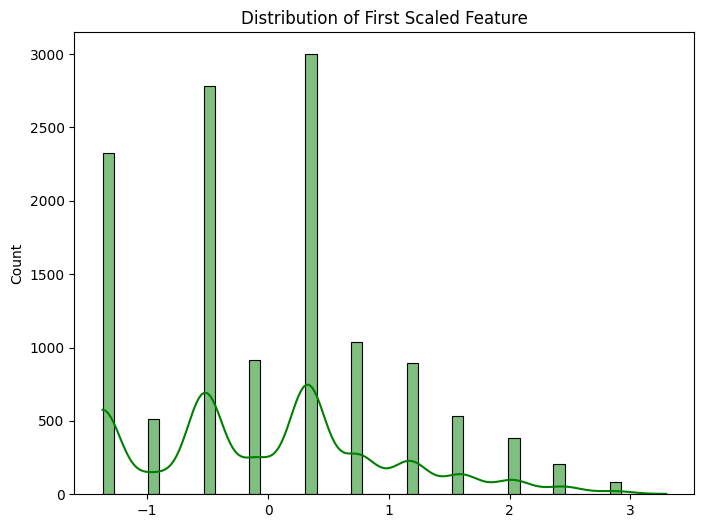

In [101]:
# Plot scaled feature distribution

plt.figure(figsize=(8, 6))
sns.histplot(X_train_scaled[:, 0], kde=True, color="green", bins=50)
plt.title("Distribution of First Scaled Feature")
plt.show()